In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
% matplotlib inline 

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv('Classified Data.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
scalered_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scalered_features,columns = df.columns[:-1])


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df['TARGET CLASS'],test_size=0.33,random_state=101)

In [40]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
ypredict = knn.predict(X_test)

In [44]:
knn.score(X_test,Y_test)

0.9242424242424242

In [49]:
sse = []
k_rng = range(1,40)
for k in k_rng:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error = np.mean(Y_test!=pred) 
    sse.append(error) 

Text(0, 0.5, 'Error Rate')

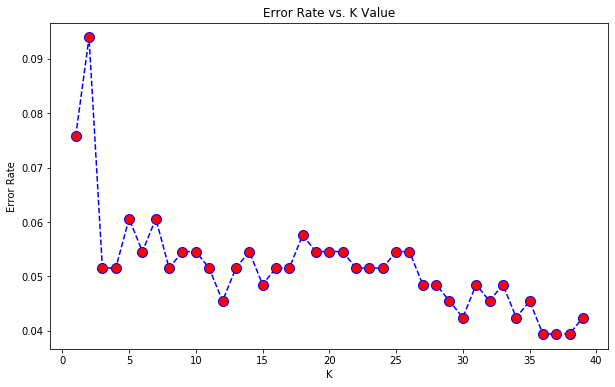

In [52]:
plt.figure(figsize=(10,6))
plt.plot(k_rng,sse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')